To mount the drive to colab, if you dont want to use colab skip this step and the next step.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is to unzip the file in drive(run this only once or if your drive has a unzipped file)

In [ ]:
!unzip "/content/drive/My Drive/traffic_signs/zipped.zip"

These are all the imports

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from math import sqrt, ceil
from timeit import default_timer as timer
import random
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler
from keras import backend as K
import os
import cv2

This part of the code loads and preprosses the data . images is a numpy ndarray that takes in all the images of all labels, Notice that ive used 13 labels and not 43. I have created my own dataset and appended it to the original dataset. (to see how i did that see my preprosing.ipynb file) 

In [ ]:
path = "/content/drive/My Drive/traffic_signs/datasets" # folder with all the class folders
labelFile = 'labels.csv' # file with all names of classes
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        grayImage = cv2.cvtColor(curImg, cv2.COLOR_BGR2GRAY)
        #cv2.normalize(grayImage, grayImage, 0, 255, cv2.NORM_MINMAX)
        grayImage =cv2.equalizeHist(grayImage)
        images.append(grayImage)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

To shuffle the dataset

In [ ]:
np.random.seed(0)
np.random.shuffle(images)
np.random.seed(0)
np.random.shuffle(classNo)

In [ ]:
To check our loaded dataset

8
(13928, 32, 32)
(13928,)
(32, 32) 0 255


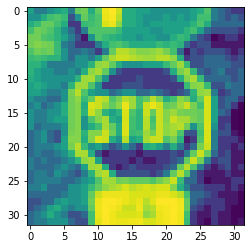

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#for i in range(10):
imgplot = plt.imshow(images[5])
print(classNo[5])
print(images.shape)
print(classNo.shape)
print(images[0].shape,images[0].min(),images[0].max())

To split our dataset into three parts,
train-80%,
validation-20%,
test-20%. 
Since we didnt normalize all the images before, we are normalizing it and checking our dataset

(8913, 32, 32)
(8913,)
(2786, 32, 32)
(2786,)
(2229, 32, 32)
(2229,)
[[1.         1.         1.         ... 0.04313726 0.07843138 0.16470589]
 [1.         1.         1.         ... 0.03137255 0.14509805 0.15294118]
 [1.         1.         1.         ... 0.02745098 0.12156863 0.14509805]
 ...
 [0.25882354 0.26666668 0.25490198 ... 0.5137255  0.3764706  0.6117647 ]
 [0.25882354 0.20784314 0.17254902 ... 0.5529412  0.4117647  0.5254902 ]
 [0.04313726 0.03137255 0.01960784 ... 0.46666667 0.27450982 0.6117647 ]]


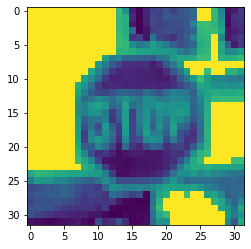

In [ ]:
testRatio = 0.2  
validationRatio = 0.2 
# Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

#normalization
X_train = X_train.astype(np.float32) / 255.0
X_validation=X_validation.astype(np.float32) / 255.0
X_test=X_test.astype(np.float32) / 255.0
#checking
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_validation.shape)
print(y_validation.shape)
imgplot = plt.imshow(X_test[5])
print(X_test[5])

We are converting our y to a label from 0-12 in decimal to one hot encoded form of the same, We are also testing the final shape

In [ ]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)
print(y_train[0])
print(y_test[0])
print(y_validation[0])

(8913, 13)
(2786, 13)
(2229, 13)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Since keras doesnt know what the input shape of the image is and also since it expects a certain shape, we are reshaping every image (the nd array)

In [ ]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 1, 32, 32)
    X_validation=X_validation.reshape(X_validation.shape[0], 1, 32, 32)
    print(Xtrain.shape)
    input_shape = (1, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
    X_validation=X_validation.reshape(X_validation.shape[0], 32, 32, 1)
    input_shape = (32, 32, 1)
    
#to test
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(8913, 32, 32, 1)
(2786, 32, 32, 1)
(2229, 32, 32, 1)


We have defined two models here, we used the second

In [ ]:
def model2():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 1)))
  model.add(MaxPool2D(pool_size=2))
  model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 1)))
  model.add(MaxPool2D(pool_size=2))
  model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 1)))
  model.add(MaxPool2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dense(13, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15
model=model2()
print(model.summary())

h = model.fit(X_train, y_train,
              batch_size=16, epochs = epochs,
              validation_data = (X_validation, y_validation),
              callbacks=[annealer], verbose=1)

# STORE THE MODEL AS A PICKLE OBJECT
pickle_out= open("model_trained_new.p","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)             

To print the accuracy

In [ ]:
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['acc']), max(h.history['val_acc'])))

Epochs=15, training accuracy=1.00000, validation accuracy=0.99237


[It is advised that you download the model that is saved in the block of code above and run this in jupyter notebook or another local host. because it is better to have these audio files in local device for the next part of the code.] This part of the code is to save in the local device, the label audio using gTTS (credits to Sai Manish)

In [ ]:
import pandas as pd
import os
from pygame import mixer
from gtts import gTTS

def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
     # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list


# Getting labels
labels = label_text(r"C:\Users\Meghana Rao\Desktop\sih\label_names.csv")


# Used for indexing
n=range(0,12)
#Creation of mp3 files and going all labels
for i in n:
    tts=gTTS(text=labels[i],lang='en-us')
    tts.save('lable'+str(i)+'.mp3')
#Playing the audio message
mixer.init()

This part of the code doesnt work if you are using google colab because it cannot access your laptops webcam.


In [ ]:
import numpy as np
import cv2
import pickle
import pandas as pd
import time
from pygame import mixer
import os

frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.90         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# IMPORT THE TRANNIED MODEL
pickle_in=open("model_trained_new.p","rb")  ## rb = READ BYTE
model=pickle.load(pickle_in)
def label_text(file):
    # Defining list for saving label in order from 0 to 12
    label_list = []
     # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list
labels = label_text(r"C:\Users\Meghana Rao\Desktop\sih\label_names.csv")

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getAudio(classNo):
    mixer.init()
    print("class: "+labels[int(classNo)])
    mixer.music.load('lable'+str(int(classNo))+'.mp3')
    mixer.music.play()

while True:

    # READ IMAGE
    success, imgOrignal = cap.read()

    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        getAudio(classIndex)
        cv2.putText(imgOrignal,str(classIndex), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        time.sleep(2)
    cv2.imshow("SIH PROJECT", imgOrignal)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break